In [63]:
import django
import os
import json
os.environ['DJANGO_SETTINGS_MODULE'] = 'django_settings'
django.setup()

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [3]:
# 마지막 color filter 

In [4]:
from monde.models import *
from mondebro.models import *

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [6]:
Product.objects.last().categories

<ProductCategories: ProductCategories object (364)>

In [7]:
def get_data_result(category, instance):
    s_data = instance.shape_result
    ch_data = instance.charm_result
    co_data = instance.colors
    d_data = instance.deco_result
    p_data = instance.pattern_result
    if category == 'shape':
        return s_data, 10
    elif category == 'charm':
        return ch_data, 6
    elif category == 'color':
        return co_data, 8
    elif category == 'deco':
        return d_data, 5.7
    elif category == 'pattern':
        return p_data, 6.7
    return None

In [8]:
def pass_filter(value, count):
    result = value * math.sqrt(((count/10) + 1) * count)
    return result

In [9]:
def filter_type(user_input, queryset):
    types = user_input.pop('type')
    qs = queryset.filter(type_result__contains=types)
    return qs

In [51]:
def product_overlap_count(user_input, instance):
    count = 0
    value = 0
#     weight = 2 # shape = color > pattern > charm > deco 
    
    for category in user_input.keys():
        data, weight = get_data_result(category, instance) # 하나의 상품에 대해 shape, charm, color 등 인풋값에 맞는 결과값 뿌려주는 함수
        user_select = user_input[category]
        if user_select in data:
            count +=1
            value += data[user_select] * weight
#     print(count)
    if count != len(user_input):
        return instance, 0
        
    result = pass_filter(value, count)

    return instance, result

In [52]:
def filtered_data(instance, user_input, result_dict):
    i, result = product_overlap_count(user_input, instance)
    if result != 0:
        result_dict[i]=result
    else:
        pass
    return result_dict

In [53]:
# count 저장해서 count 다 맞는 애들 우선 보여주고 그 밑으로 -1인 애들 정렬.. => 이것보단 핕터 자체적으로? ==> 생각해보니 0.2 가 맞아서 4개 매칭된 거랑 값이 없어서 3개 매칭된거랑 결국 똑같지 않나? 0.2 매칭된거는 없는거나 마찬가지니까?

def search(user_input):
    queryset = ProductCategories.objects.all()
    qs = filter_type(user_input, queryset)
    result_dict = {}
    for q in qs:
        result_dict = filtered_data(q, user_input, result_dict)
    sorted_category_result_list = sorted(result_dict, key=lambda kv: result_dict[kv], reverse=True)
    sorted_product = list(map(lambda x: x.product, sorted_category_result_list))
    res = sorted(result_dict.items(), key=f2, reverse=True)
    print(res)
    return sorted_product

In [54]:
def f2(x):
    return x[1]

In [59]:
user_input = {
    'type': 'cross_bag',
    'color': 'red',
    'shape': 'square',
    'charm':'tassel'
}

In [60]:
user_input

{'type': 'cross_bag', 'color': 'red', 'shape': 'square', 'charm': 'tassel'}

In [61]:
r= search(user_input)

[(<ProductCategories: ProductCategories object (153)>, 47.3962023795156)]


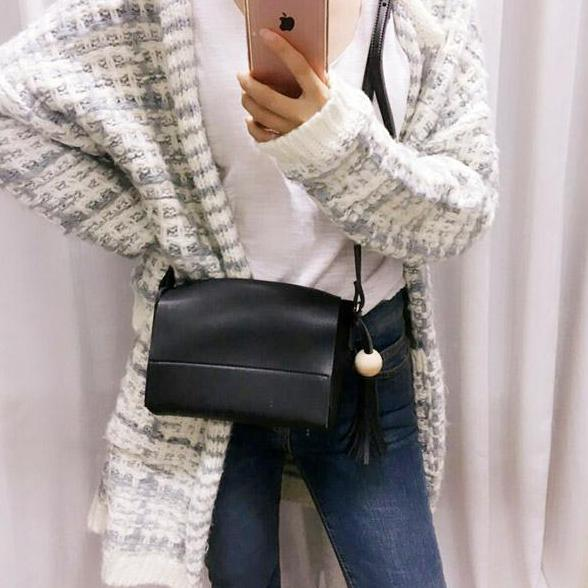

153
http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=641964&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=Z2t3UFg%3D


In [62]:
for ra in r:
    URL = ra.product_image_url
    display(Image(requests.get(URL).content ,height=10))
    print(ra.categories.id)
    print(ra.product_url)

In [100]:
ProductCategories.objects.filter(colors__isnull=True)

<QuerySet []>

In [101]:
a={}

In [102]:
if not a:
    print('--')

--


In [2]:
import requests
from io import BytesIO
from PIL import Image
from django.core.files.images import get_image_dimensions

In [10]:
i=ProductMaster.objects.last().product_image

In [1]:
a={}
b={'null':1}

In [2]:
if a == {}:
    print('--')

--


In [7]:
if 'null' in b:
    print('--')

--


In [5]:
if a=={} or null in b.keys():
    print('--')

--


In [9]:
print(b.keys())

dict_keys(['null'])


In [5]:
ProductMaster.objects.last().tag_category

AttributeError: 'ProductMaster' object has no attribute 'tag_category'

In [64]:
a={}
b={"a":1}

In [65]:
a+b

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'